Running Prewitt on bike.png...


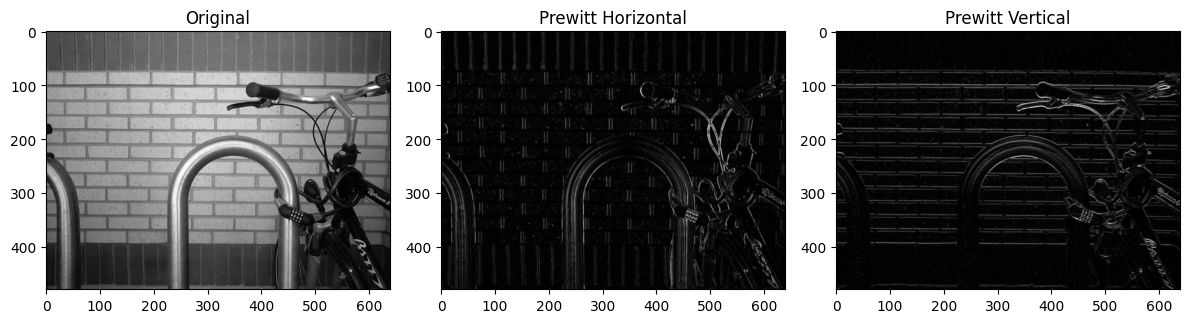

Running Prewitt on berndsface.png...


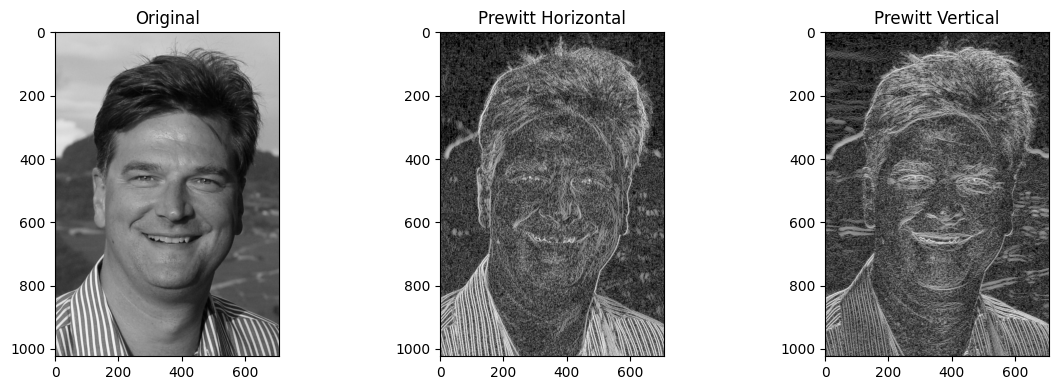

Running Prewitt Thresholding...


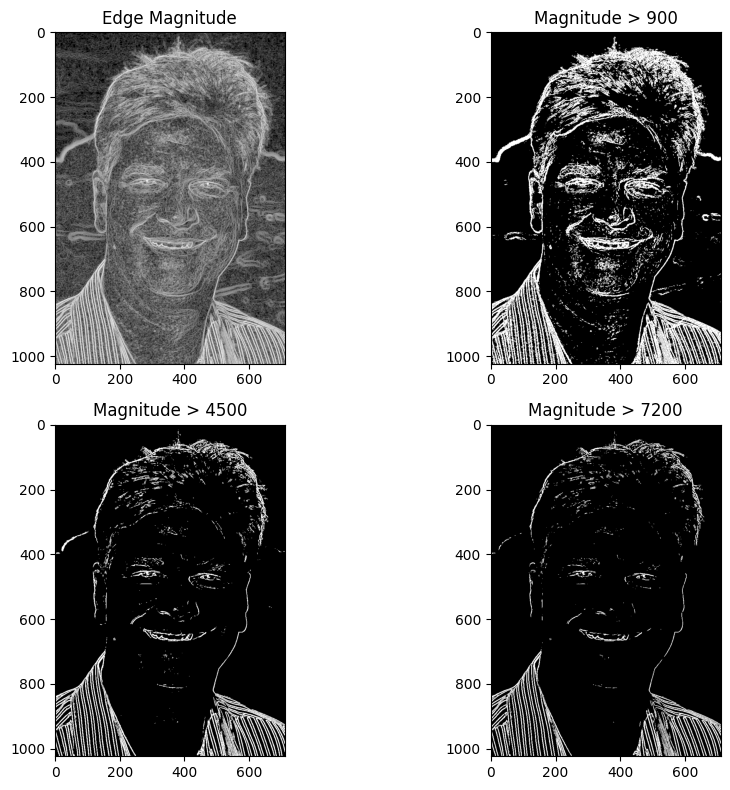

Running Sobel Thresholding...


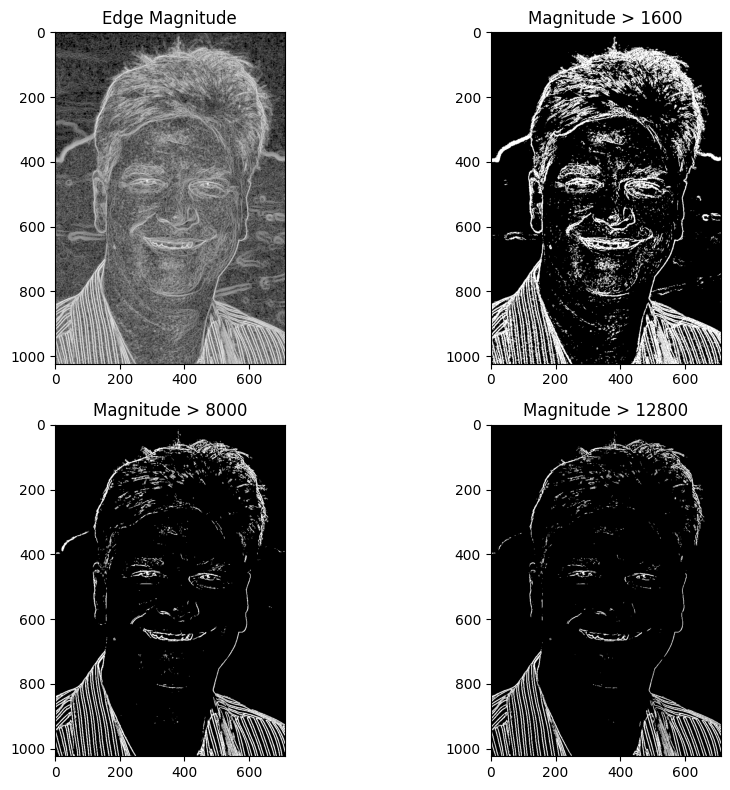

Running Roberts Cross...


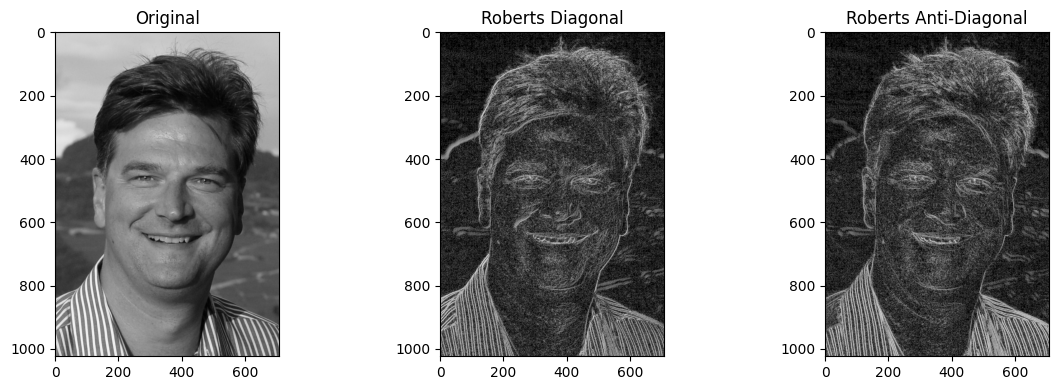

Running Roberts Thresholding...


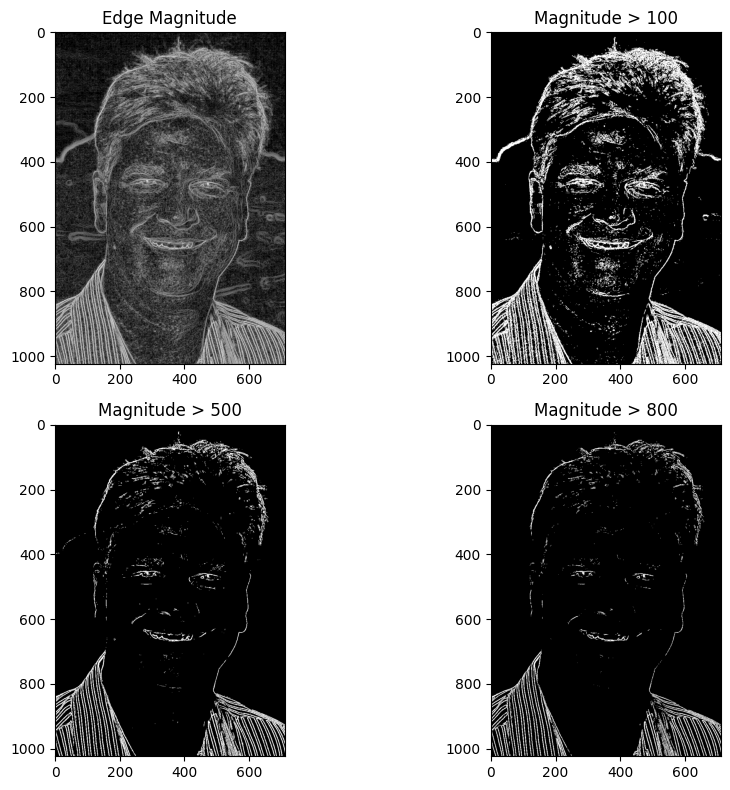

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def normalize_and_save(img, filename):
    max_val = np.max(img)
    if max_val == 0:
        norm_img = img
    else:
        norm_img = img / max_val
    
    save_img = (norm_img * 255).astype(np.uint8)
    cv2.imwrite(filename, save_img)
    return norm_img

def run_edge_operators():

    h_prewitt_base = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=np.float64)
    
    h_sobel_base = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype=np.float64)

    print("Running Prewitt on bike.png...")
    img = cv2.imread('bike.png', cv2.IMREAD_GRAYSCALE).astype(np.float64)

    h_horizontal = h_prewitt_base.T 
    filtered_img1 = cv2.filter2D(img, -1, h_horizontal, borderType=cv2.BORDER_REPLICATE)
    filtered_img1 = np.abs(filtered_img1)
    

    h_vertical = h_prewitt_base
    filtered_img2 = cv2.filter2D(img, -1, h_vertical, borderType=cv2.BORDER_REPLICATE)
    filtered_img2 = np.abs(filtered_img2)

    
    norm1 = normalize_and_save(filtered_img1, 'Prewitt_bike_horizontal.png')
    norm2 = normalize_and_save(filtered_img2, 'Prewitt_bike_vertical.png')

    
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1); plt.imshow(img, cmap='gray'); plt.title('Original')
    plt.subplot(1, 3, 2); plt.imshow(norm1, cmap='gray'); plt.title('Prewitt Horizontal')
    plt.subplot(1, 3, 3); plt.imshow(norm2, cmap='gray'); plt.title('Prewitt Vertical')
    plt.tight_layout(); plt.show()

    
    
    print("Running Prewitt on berndsface.png...")
    img = cv2.imread('berndsface.png', cv2.IMREAD_GRAYSCALE).astype(np.float64)

    filtered_img1 = cv2.filter2D(img, -1, h_prewitt_base.T, borderType=cv2.BORDER_REPLICATE)
    filtered_img1 = np.log(np.abs(filtered_img1) + 1)
    
    filtered_img2 = cv2.filter2D(img, -1, h_prewitt_base, borderType=cv2.BORDER_REPLICATE)
    filtered_img2 = np.log(np.abs(filtered_img2) + 1)

    norm1 = normalize_and_save(filtered_img1, 'Prewitt_face_horizontal.png')
    norm2 = normalize_and_save(filtered_img2, 'Prewitt_face_vertical.png')

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1); plt.imshow(img, cmap='gray'); plt.title('Original')
    plt.subplot(1, 3, 2); plt.imshow(norm1, cmap='gray'); plt.title('Prewitt Horizontal')
    plt.subplot(1, 3, 3); plt.imshow(norm2, cmap='gray'); plt.title('Prewitt Vertical')
    plt.tight_layout(); plt.show()


    print("Running Prewitt Thresholding...")
    f1 = cv2.filter2D(img, -1, h_prewitt_base.T, borderType=cv2.BORDER_REPLICATE)
    f2 = cv2.filter2D(img, -1, h_prewitt_base, borderType=cv2.BORDER_REPLICATE)

    edge_sum = f1**2 + f2**2
    log_edge_sum = np.log(edge_sum + 1)
    
    norm_log_sum = normalize_and_save(log_edge_sum, 'Prewitt_face_logEdgeSum.png')

    bw_edge1 = (edge_sum > 900).astype(np.uint8) * 255
    bw_edge2 = (edge_sum > 4500).astype(np.uint8) * 255
    bw_edge3 = (edge_sum > 7200).astype(np.uint8) * 255

    cv2.imwrite('Prewitt_face_bwEdge1.png', bw_edge1)
    cv2.imwrite('Prewitt_face_bwEdge2.png', bw_edge2)
    cv2.imwrite('Prewitt_face_bwEdge3.png', bw_edge3)

    plt.figure(figsize=(10, 8))
    plt.subplot(2, 2, 1); plt.imshow(norm_log_sum, cmap='gray'); plt.title('Edge Magnitude')
    plt.subplot(2, 2, 2); plt.imshow(bw_edge1, cmap='gray'); plt.title('Magnitude > 900')
    plt.subplot(2, 2, 3); plt.imshow(bw_edge2, cmap='gray'); plt.title('Magnitude > 4500')
    plt.subplot(2, 2, 4); plt.imshow(bw_edge3, cmap='gray'); plt.title('Magnitude > 7200')
    plt.tight_layout(); plt.show()


    

    print("Running Sobel Thresholding...")

    f1 = cv2.filter2D(img, -1, h_sobel_base.T, borderType=cv2.BORDER_REPLICATE)
    f2 = cv2.filter2D(img, -1, h_sobel_base, borderType=cv2.BORDER_REPLICATE)

    edge_sum = f1**2 + f2**2
    log_edge_sum = np.log(edge_sum + 1)
    norm_log_sum = normalize_and_save(log_edge_sum, 'Sobel_face_logEdgeSum.png')

    bw_edge1 = (edge_sum > 1600).astype(np.uint8) * 255
    bw_edge2 = (edge_sum > 8000).astype(np.uint8) * 255
    bw_edge3 = (edge_sum > 12800).astype(np.uint8) * 255

    cv2.imwrite('Sobel_face_bwEdge1.png', bw_edge1)
    cv2.imwrite('Sobel_face_bwEdge2.png', bw_edge2)
    cv2.imwrite('Sobel_face_bwEdge3.png', bw_edge3)

    plt.figure(figsize=(10, 8))
    plt.subplot(2, 2, 1); plt.imshow(norm_log_sum, cmap='gray'); plt.title('Edge Magnitude')
    plt.subplot(2, 2, 2); plt.imshow(bw_edge1, cmap='gray'); plt.title('Magnitude > 1600')
    plt.subplot(2, 2, 3); plt.imshow(bw_edge2, cmap='gray'); plt.title('Magnitude > 8000')
    plt.subplot(2, 2, 4); plt.imshow(bw_edge3, cmap='gray'); plt.title('Magnitude > 12800')
    plt.tight_layout(); plt.show()

    

    print("Running Roberts Cross...")
    
    h_roberts1 = np.array([[1, 0], [0, -1]], dtype=np.float64)
    filtered1 = cv2.filter2D(img, -1, h_roberts1.T, borderType=cv2.BORDER_REPLICATE)
    filtered1_log = np.log(np.abs(filtered1) + 1)
    norm1 = normalize_and_save(filtered1_log, 'Roberts_face_vertical.png')

    h_roberts2 = np.array([[0, 1], [-1, 0]], dtype=np.float64)
    filtered2 = cv2.filter2D(img, -1, h_roberts2, borderType=cv2.BORDER_REPLICATE)
    filtered2_log = np.log(np.abs(filtered2) + 1)
    norm2 = normalize_and_save(filtered2_log, 'Roberts_face_horizontal.png')

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1); plt.imshow(img.astype(np.uint8), cmap='gray'); plt.title('Original')
    plt.subplot(1, 3, 2); plt.imshow(norm1, cmap='gray'); plt.title('Roberts Diagonal')
    plt.subplot(1, 3, 3); plt.imshow(norm2, cmap='gray'); plt.title('Roberts Anti-Diagonal')
    plt.tight_layout(); plt.show()

    print("Running Roberts Thresholding...")
    

    f1 = cv2.filter2D(img, -1, h_roberts1.T, borderType=cv2.BORDER_REPLICATE)
    f2 = cv2.filter2D(img, -1, h_roberts2, borderType=cv2.BORDER_REPLICATE)

    edge_sum = f1**2 + f2**2
    log_edge_sum = np.log(edge_sum + 1)
    norm_log_sum = normalize_and_save(log_edge_sum, 'Roberts_face_logEdgeSum.png')

    bw_edge1 = (edge_sum > 100).astype(np.uint8) * 255
    bw_edge2 = (edge_sum > 500).astype(np.uint8) * 255
    bw_edge3 = (edge_sum > 800).astype(np.uint8) * 255

    cv2.imwrite('Roberts_face_bwEdge1.png', bw_edge1)
    cv2.imwrite('Roberts_face_bwEdge2.png', bw_edge2)
    cv2.imwrite('Roberts_face_bwEdge3.png', bw_edge3)

    plt.figure(figsize=(10, 8))
    plt.subplot(2, 2, 1); plt.imshow(norm_log_sum, cmap='gray'); plt.title('Edge Magnitude')
    plt.subplot(2, 2, 2); plt.imshow(bw_edge1, cmap='gray'); plt.title('Magnitude > 100')
    plt.subplot(2, 2, 3); plt.imshow(bw_edge2, cmap='gray'); plt.title('Magnitude > 500')
    plt.subplot(2, 2, 4); plt.imshow(bw_edge3, cmap='gray'); plt.title('Magnitude > 800')
    plt.tight_layout(); plt.show()

if __name__ == "__main__":
    run_edge_operators()

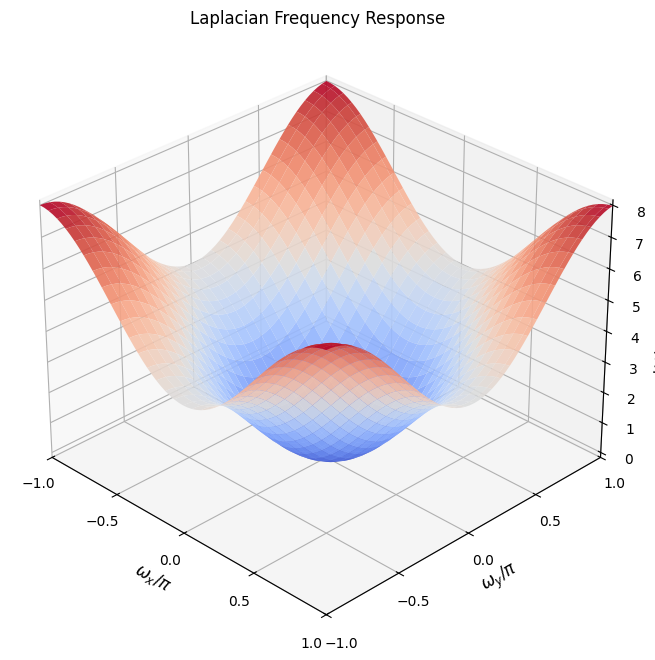

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

h = np.array([[0, 1, 0],
              [1, -4, 1],
              [0, 1, 0]])

N = 64
H = np.fft.fft2(h, s=(N, N))
H_shifted = np.fft.fftshift(H)


x = np.linspace(-1, 1, N)
y = np.linspace(-1, 1, N)
X, Y = np.meshgrid(x, y)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


surf = ax.plot_surface(X, Y, np.abs(H_shifted), cmap=cm.coolwarm, linewidth=0.5, antialiased=True, alpha=0.9)

ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_xlabel(r'$\omega_x / \pi$', fontsize=12)
ax.set_ylabel(r'$\omega_y / \pi$', fontsize=12)
ax.set_zlabel(r'$| H(\omega_x, \omega_y) |$', fontsize=12)

ticks = np.arange(-1, 1.5, 0.5)
ax.set_xticks(ticks)
ax.set_yticks(ticks)

ax.view_init(elev=30, azim=-45)

plt.title('Laplacian Frequency Response')
plt.show()

Discrete Kernel (h):
[[  0.   0.   1.   2.   2.   2.   1.   0.   0.]
 [  0.   2.   4.   5.   5.   5.   4.   2.   0.]
 [  1.   4.   6.   3.   0.   3.   6.   4.   1.]
 [  2.   5.   3. -12. -23. -12.   3.   5.   2.]
 [  2.   5.   0. -23. -40. -23.   0.   5.   2.]
 [  2.   5.   3. -12. -23. -12.   3.   5.   2.]
 [  1.   4.   6.   3.   0.   3.   6.   4.   1.]
 [  0.   2.   4.   5.   5.   5.   4.   2.   0.]
 [  0.   0.   1.   2.   2.   2.   1.   0.   0.]]


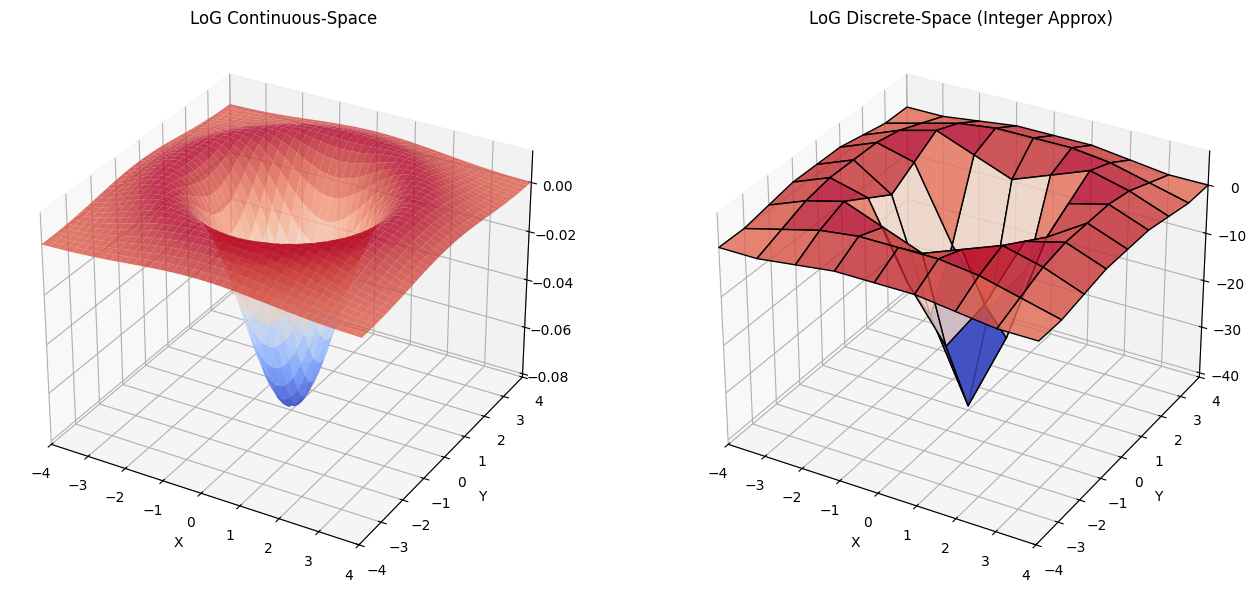

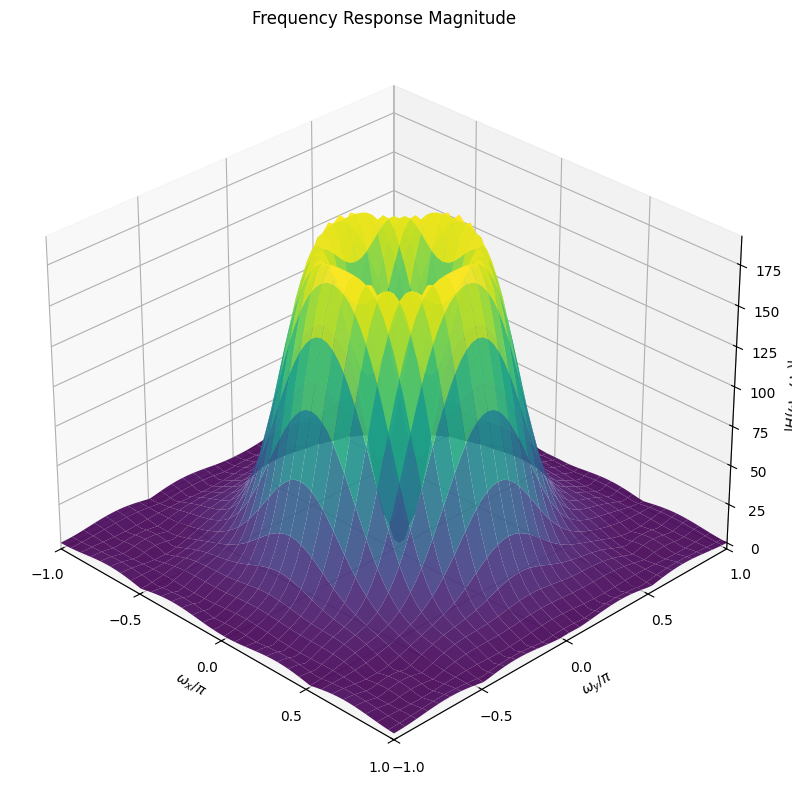

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

sigma = np.sqrt(2)
x = np.arange(-4, 4.01, 0.1)
y = x
X, Y = np.meshgrid(x, y)

r2 = X**2 + Y**2
Z = (-1 / (np.pi * sigma**4)) * (1 - r2 / (2 * sigma**2)) * np.exp(-r2 / (2 * sigma**2))

def create_log_kernel(size, sigma):

    k = (size - 1) // 2
    x = np.arange(-k, k + 1)
    y = np.arange(-k, k + 1)
    XX, YY = np.meshgrid(x, y)
    
    r2 = XX**2 + YY**2
    h = (r2 - 2*sigma**2) * np.exp(-r2 / (2*sigma**2))
    
    h = h - h.mean()
    return h, x, y

h_raw, x_disc, y_disc = create_log_kernel(9, sigma)

min_val = np.abs(np.min(h_raw))
h = np.round(h_raw / min_val * 40)

print("Discrete Kernel (h):")
print(h)

X1, Y1 = np.meshgrid(x_disc, y_disc)

fig1 = plt.figure(figsize=(14, 6))

ax1 = fig1.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(X, Y, Z, cmap=cm.coolwarm, rstride=2, cstride=2, alpha=0.8)
ax1.set_title('LoG Continuous-Space')
ax1.set_xlabel('X'); ax1.set_ylabel('Y')
ax1.set_xlim([-4, 4]); ax1.set_ylim([-4, 4])

ax2 = fig1.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(X1, Y1, h, cmap=cm.coolwarm, rstride=1, cstride=1, edgecolor='k', alpha=0.8)
ax2.set_title('LoG Discrete-Space (Integer Approx)')
ax2.set_xlabel('X'); ax2.set_ylabel('Y')
ax2.set_xlim([-4, 4]); ax2.set_ylim([-4, 4])

plt.tight_layout()
plt.show()


N = 64
H_fft = np.fft.fft2(h, s=(N, N))
H_shifted = np.fft.fftshift(H_fft)

wx = np.linspace(-1, 1, N)
wy = np.linspace(-1, 1, N)
X_freq, Y_freq = np.meshgrid(wx, wy)

fig2 = plt.figure(figsize=(10, 8))
ax3 = fig2.add_subplot(111, projection='3d')

surf = ax3.plot_surface(X_freq, Y_freq, np.abs(H_shifted), cmap=cm.viridis, 
                        linewidth=0.5, antialiased=True, alpha=0.9)

ax3.set_title('Frequency Response Magnitude')
ax3.set_xlabel(r'$\omega_x / \pi$')
ax3.set_ylabel(r'$\omega_y / \pi$')
ax3.set_zlabel(r'$| H(\omega_x, \omega_y) |$')

ax3.set_xlim([-1, 1]); ax3.set_ylim([-1, 1])
ticks = [-1, -0.5, 0, 0.5, 1]
ax3.set_xticks(ticks); ax3.set_yticks(ticks)

ax3.view_init(elev=30, azim=-45)

plt.tight_layout()
plt.show()

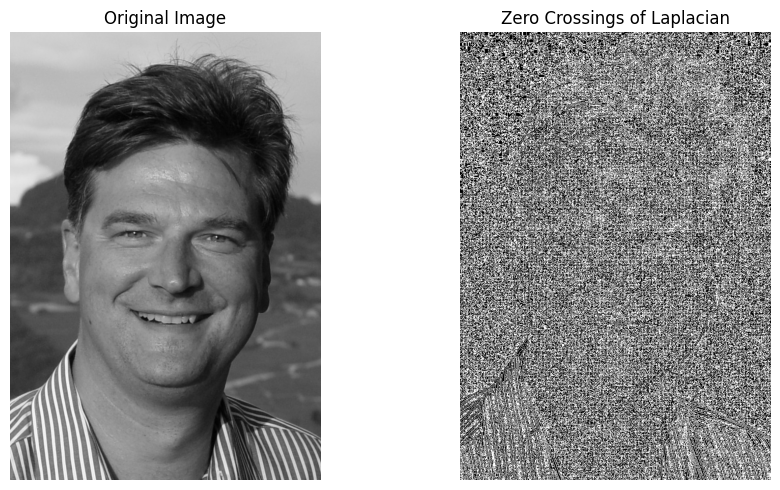

Gambar disimpan sebagai 'Zero_crossings_laplacian.png'


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_zero_crossings(laplacian_img):
    rows, cols = laplacian_img.shape

    zero_crossings = np.zeros((rows, cols), dtype=np.uint8)
    thresh = 0.0

    diff_horizontal = (laplacian_img[:, :-1] * laplacian_img[:, 1:]) < 0
    zero_crossings[:, 1:][diff_horizontal] = 255
    
    diff_vertical = (laplacian_img[:-1, :] * laplacian_img[1:, :]) < 0
    zero_crossings[1:, :][diff_vertical] = 255
    
    return zero_crossings

filename = 'berndsface.png'
try:
    img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    if img is None: raise FileNotFoundError
except:
    print(f"File '{filename}' tidak ditemukan, membuat gambar dummy.")
    img = np.zeros((200, 200), dtype=np.uint8)
    cv2.circle(img, (100, 100), 50, 150, -1)

h = np.array([[0, 1, 0],
              [1, -4, 1],
              [0, 1, 0]], dtype=np.float64)

laplacian_response = cv2.filter2D(img.astype(np.float64), cv2.CV_64F, h)


bw = find_zero_crossings(laplacian_response)


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(bw, cmap='gray')
plt.title('Zero Crossings of Laplacian')
plt.axis('off')

plt.tight_layout()
plt.show()

cv2.imwrite('Zero_crossings_laplacian.png', bw)
print("Gambar disimpan sebagai 'Zero_crossings_laplacian.png'")

Running LoG without threshold...


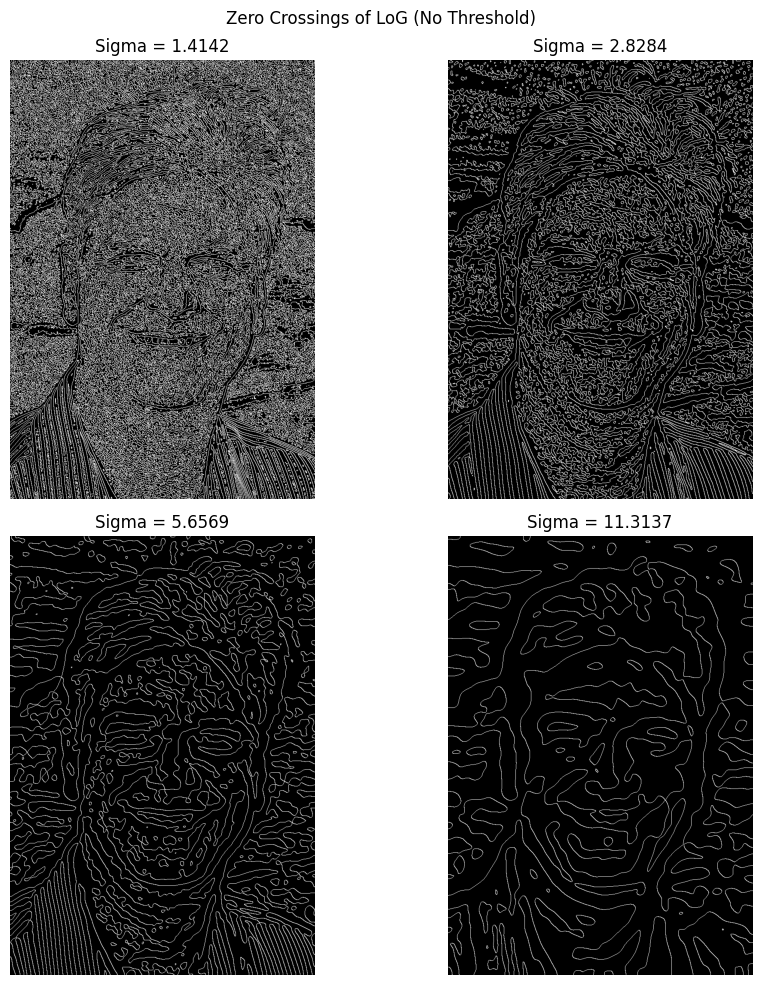

Running LoG with threshold...


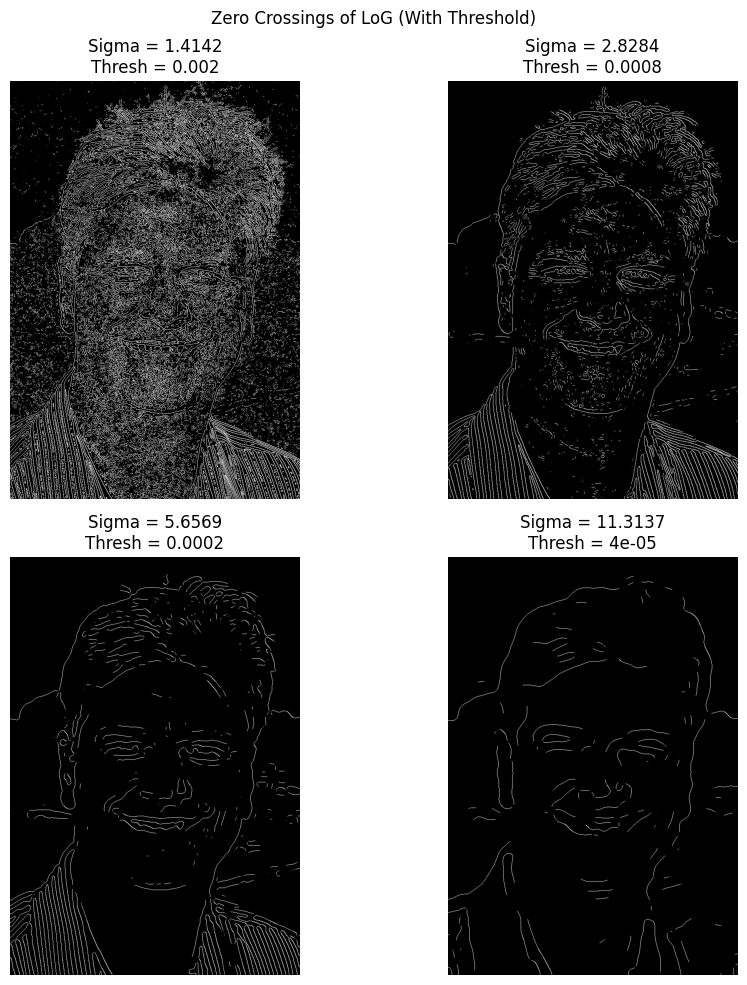

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_laplace

def detect_log_edges(img_float, sigma, threshold=0):

    log_response = gaussian_laplace(img_float, sigma=sigma)

    sign_change_h = (log_response[:, :-1] * log_response[:, 1:]) < 0
    mag_check_h = np.abs(log_response[:, :-1] - log_response[:, 1:]) > threshold
    
    edge_h = sign_change_h & mag_check_h
    
    edges = np.zeros_like(img_float, dtype=bool)
    edges[:, 1:][edge_h] = True
    
    sign_change_v = (log_response[:-1, :] * log_response[1:, :]) < 0
    mag_check_v = np.abs(log_response[:-1, :] - log_response[1:, :]) > threshold
    
    edge_v = sign_change_v & mag_check_v
    
    edges[1:, :][edge_v] = True
    
    return edges

filename = 'berndsface.png'
img_raw = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

if img_raw is None:
    print(f"File {filename} tidak ditemukan. Menggunakan dummy image.")
    img_raw = np.zeros((256, 256), dtype=np.uint8)
    cv2.circle(img_raw, (128, 128), 50, 200, -1)

img = img_raw.astype(np.float64) / 255.0

print("Running LoG without threshold...")
thresh_val = 0
sigma_array = [np.sqrt(2), np.sqrt(8), np.sqrt(32), np.sqrt(128)]

plt.figure(figsize=(10, 10))

for i, sigma in enumerate(sigma_array):
    bw = detect_log_edges(img, sigma, thresh_val)
    
    plt.subplot(2, 2, i + 1)
    plt.imshow(bw, cmap='gray')
    plt.title(f'Sigma = {sigma:.4f}')
    plt.axis('off')
    
    save_img = (bw * 255).astype(np.uint8)
    cv2.imwrite(f'Zero_crossings_log_no_thresh_{sigma:.4f}.png', save_img)

plt.suptitle('Zero Crossings of LoG (No Threshold)')
plt.tight_layout()
plt.show()

print("Running LoG with threshold...")
thresh_array = [0.002, 0.0008, 0.0002, 0.00004]

plt.figure(figsize=(10, 10))

for i, sigma in enumerate(sigma_array):
    current_thresh = thresh_array[i]
    
    bw = detect_log_edges(img, sigma, current_thresh)
    
    plt.subplot(2, 2, i + 1)
    plt.imshow(bw, cmap='gray')
    plt.title(f'Sigma = {sigma:.4f}\nThresh = {current_thresh}')
    plt.axis('off')
    
    save_img = (bw * 255).astype(np.uint8)
    cv2.imwrite(f'Zero_crossings_log_thresh_{sigma:.4f}.png', save_img)

plt.suptitle('Zero Crossings of LoG (With Threshold)')
plt.tight_layout()
plt.show()

Memproses 'berndsface.png'...
Disimpan: Canny_face_1.41.png
Disimpan: Canny_face_2.83.png
Disimpan: Canny_face_5.66.png


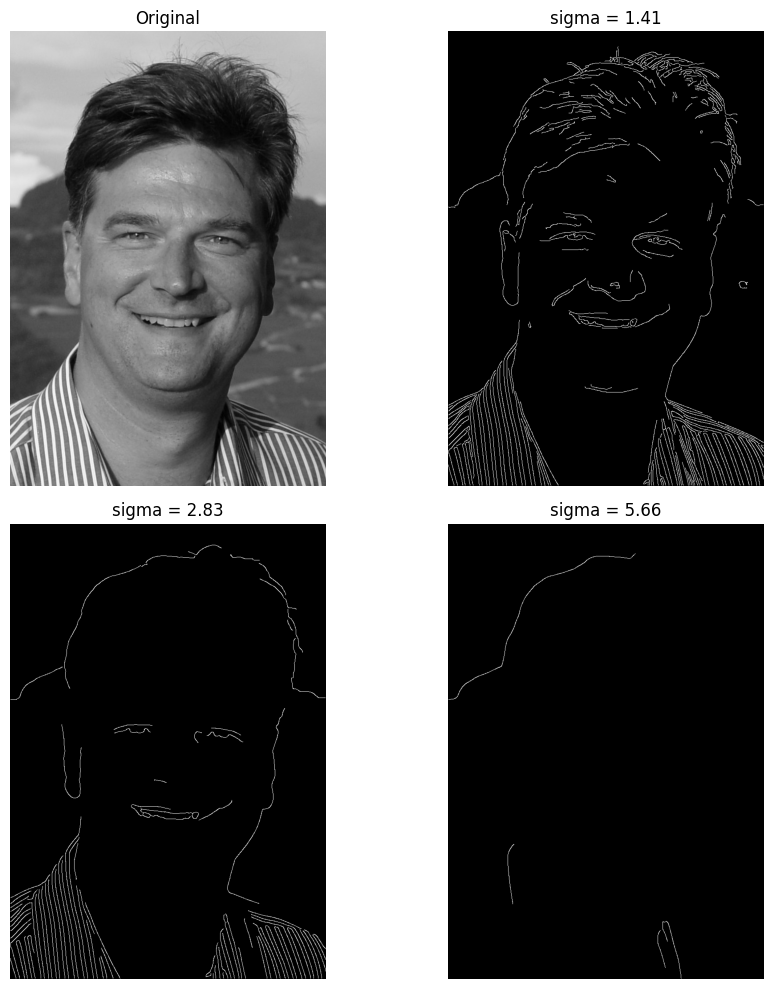


Memproses 'bike.png'...


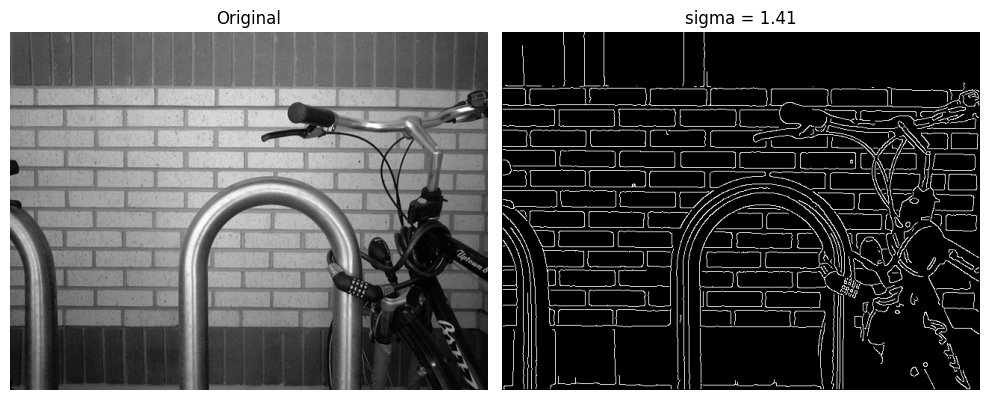

Disimpan: Canny_bike_1.41.png


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature

def run_canny_detector():
    thresh_high = 0.3
    thresh_low = 0.4 * thresh_high
    
    sigma_array = [np.sqrt(2), np.sqrt(8), np.sqrt(32)]
    
    filename_face = 'berndsface.png'
    
    try:
        img_face = cv2.imread(filename_face, cv2.IMREAD_GRAYSCALE)
        if img_face is None: raise FileNotFoundError
        img_face = img_face.astype(np.float64) / 255.0
    except:
        print(f"File {filename_face} tidak ditemukan, membuat dummy.")
        img_face = np.zeros((200, 200))
        cv2.circle(img_face, (100, 100), 50, 0.8, -1)

    plt.figure(figsize=(10, 10))
    
    plt.subplot(2, 2, 1)
    plt.imshow(img_face, cmap='gray')
    plt.title('Original')
    plt.axis('off')

    print("Memproses 'berndsface.png'...")
    for i, sigma in enumerate(sigma_array):
        edges = feature.canny(image=img_face, sigma=sigma, low_threshold=thresh_low, high_threshold=thresh_high)
        
        plt.subplot(2, 2, i + 2)
        plt.imshow(edges, cmap='gray')
        plt.title(f'sigma = {sigma:.2f}')
        plt.axis('off')
        
        save_img = (edges * 255).astype(np.uint8)
        out_name = f'Canny_face_{sigma:.2f}.png'
        cv2.imwrite(out_name, save_img)
        print(f"Disimpan: {out_name}")

    plt.tight_layout()
    plt.show()

    filename_bike = 'bike.png'
    
    try:
        img_bike = cv2.imread(filename_bike, cv2.IMREAD_GRAYSCALE)
        if img_bike is None: raise FileNotFoundError
        img_bike = img_bike.astype(np.float64) / 255.0
    except:
        print(f"File {filename_bike} tidak ditemukan, membuat dummy.")
        img_bike = np.zeros((200, 200))
        cv2.rectangle(img_bike, (50, 50), (150, 150), 0.8, -1)

    sigma = sigma_array[0]
    
    print("\nMemproses 'bike.png'...")
    edges_bike = feature.canny(image=img_bike, 
                               sigma=sigma, 
                               low_threshold=thresh_low, 
                               high_threshold=thresh_high)

    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(img_bike, cmap='gray')
    plt.title('Original')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(edges_bike, cmap='gray')
    plt.title(f'sigma = {sigma:.2f}')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    save_img_bike = (edges_bike * 255).astype(np.uint8)
    out_name_bike = f'Canny_bike_{sigma:.2f}.png'
    cv2.imwrite(out_name_bike, save_img_bike)
    print(f"Disimpan: {out_name_bike}")

if __name__ == "__main__":
    run_canny_detector()

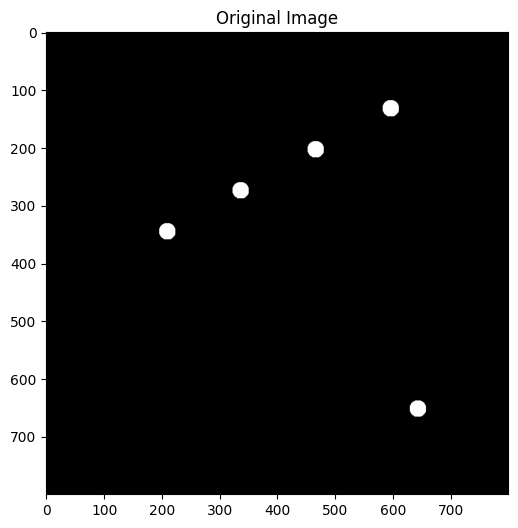

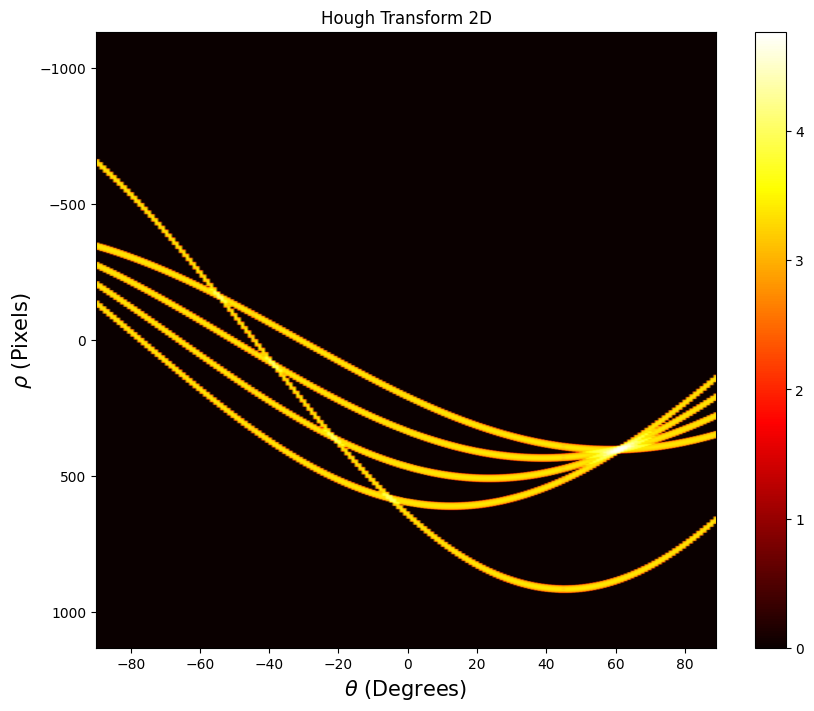

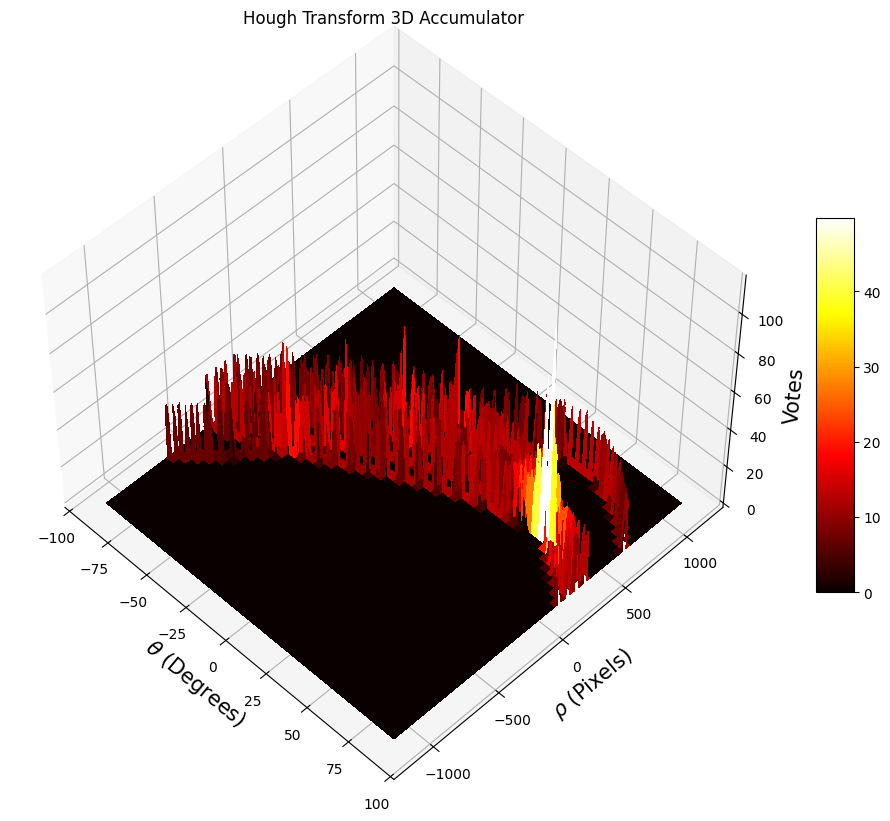

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import hough_line
from skimage import color, io
import cv2
import os

filename = 'dots.png'

if not os.path.exists(filename):
    print(f"File '{filename}' tidak ditemukan. Membuat gambar dummy...")
    img_dummy = np.zeros((200, 200), dtype=np.uint8)
    cv2.circle(img_dummy, (50, 50), 3, 255, -1)
    cv2.circle(img_dummy, (100, 100), 3, 255, -1)
    cv2.circle(img_dummy, (150, 150), 3, 255, -1)
    cv2.circle(img_dummy, (50, 150), 3, 255, -1)
    bw = img_dummy
else:
    bw = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(6, 6))
plt.imshow(bw, cmap='gray')
plt.title('Original Image')
plt.axis('on')
plt.show()

H, theta, rho = hough_line(bw)

theta_deg = np.rad2deg(theta)

fig1 = plt.figure(figsize=(10, 8))
ax1 = fig1.add_subplot(111)

extent = [theta_deg[0], theta_deg[-1], rho[-1], rho[0]]

im = ax1.imshow(np.log(1 + H), extent=extent, cmap='hot', aspect='auto')

ax1.set_title('Hough Transform 2D')
ax1.set_xlabel(r'$\theta$ (Degrees)', fontsize=15)
ax1.set_ylabel(r'$\rho$ (Pixels)', fontsize=15)
fig1.colorbar(im, ax=ax1)

fig1.savefig('Hough_transform_2d.png')
plt.show()

T, R = np.meshgrid(theta_deg, rho)

fig2 = plt.figure(figsize=(12, 8))
ax2 = fig2.add_subplot(111, projection='3d')

surf = ax2.plot_surface(T, R, H, cmap='hot', linewidth=0, antialiased=False)

ax2.set_title('Hough Transform 3D Accumulator')
ax2.set_xlabel(r'$\theta$ (Degrees)', fontsize=15)
ax2.set_ylabel(r'$\rho$ (Pixels)', fontsize=15)
ax2.set_zlabel('Votes', fontsize=15)

ax2.view_init(elev=50, azim=-45)

fig2.colorbar(surf, ax=ax2, shrink=0.5, aspect=10)
fig2.tight_layout()

# Simpan
fig2.savefig('Hough_transform_3d.png')
plt.show()

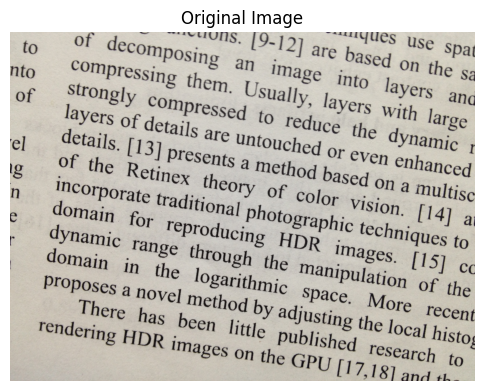

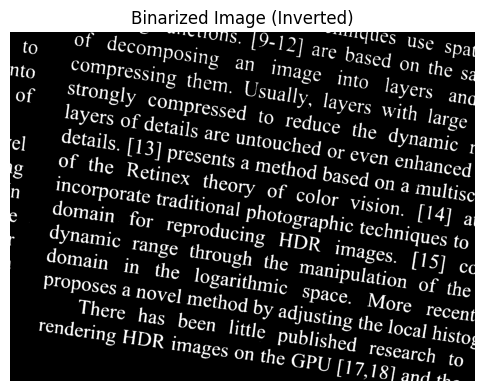

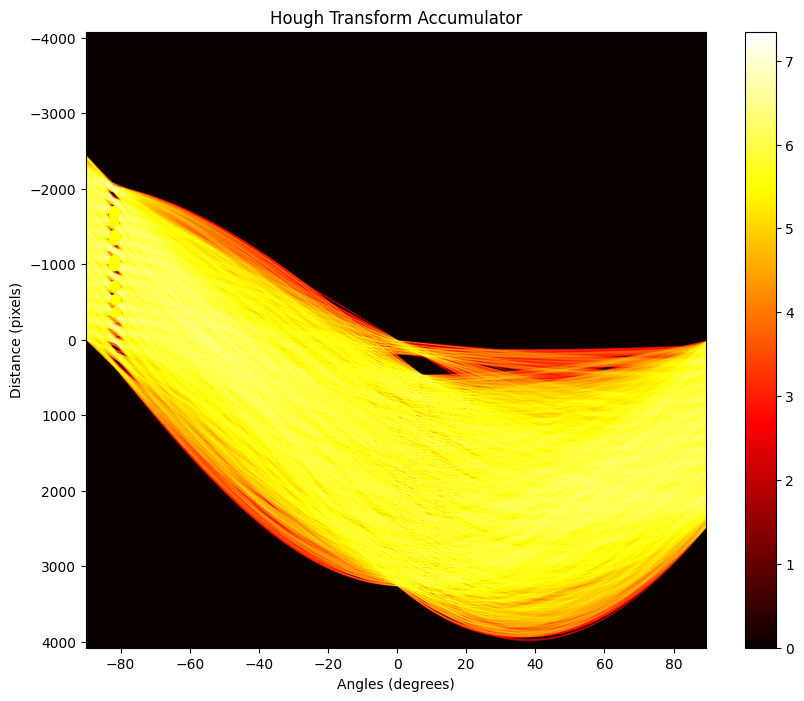

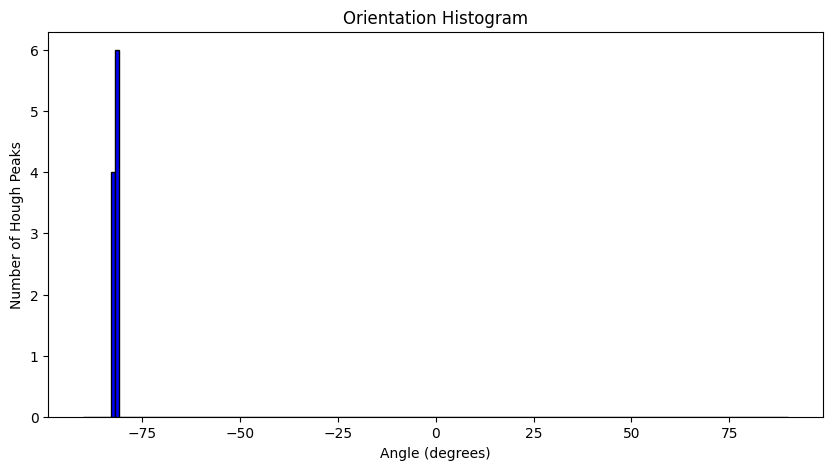

Detected Median Angle: -81.90 degrees
Rotating by: 8.10 degrees


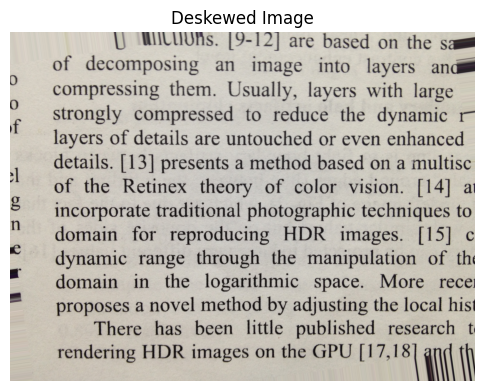

True

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import hough_line, hough_line_peaks, rotate
from skimage.filters import threshold_otsu
from skimage import io, color, img_as_ubyte
import cv2
import os

filename = 'paper.jpg'

if not os.path.exists(filename):
    print(f"File '{filename}' tidak ditemukan. Membuat gambar dummy miring...")
    dummy = np.ones((400, 300), dtype=np.uint8) * 255
    for y in range(50, 350, 30):
        cv2.line(dummy, (50, y), (250, y), 0, 2)
    img = rotate(dummy, 10, mode='constant', cval=1)
    img = img_as_ubyte(img)
else:
    img = io.imread(filename)

plt.figure(figsize=(6, 8))
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

if img.ndim == 3:
    gray = color.rgb2gray(img)
else:
    gray = img.astype(float) / 255.0

thresh = threshold_otsu(gray)
bw_img = gray < thresh

plt.figure(figsize=(6, 8))
plt.imshow(bw_img, cmap='gray')
plt.title('Binarized Image (Inverted)')
plt.axis('off')
plt.show()

cv2.imwrite('Hough_Transform_Paper_bw.png', img_as_ubyte(bw_img))

tested_angles = np.deg2rad(np.arange(-90, 89.5, 0.1))
H, theta, rho = hough_line(bw_img, theta=tested_angles)

plt.figure(figsize=(10, 8))
extent = [np.rad2deg(theta[0]), np.rad2deg(theta[-1]), rho[-1], rho[0]]
plt.imshow(np.log(1 + H), extent=extent, cmap='hot', aspect='auto')
plt.title('Hough Transform Accumulator')
plt.xlabel('Angles (degrees)')
plt.ylabel('Distance (pixels)')
plt.colorbar()


min_val = 0.2 * np.max(H)
accum, angles, dists = hough_line_peaks(H, theta, rho, threshold=min_val, num_peaks=10)

plt.scatter(np.rad2deg(angles), dists, marker='o', color='yellow', s=50)
plt.show()

angles_deg = np.rad2deg(angles)
theta_bins = np.arange(-90, 91, 1)

plt.figure(figsize=(10, 5))
plt.hist(angles_deg, bins=theta_bins, color='blue', edgecolor='black')
plt.title('Orientation Histogram')
plt.xlabel('Angle (degrees)')
plt.ylabel('Number of Hough Peaks')
plt.show()

median_angle = np.median(angles_deg)
print(f"Detected Median Angle: {median_angle:.2f} degrees")


rotation_angle = 90 + median_angle
print(f"Rotating by: {rotation_angle:.2f} degrees")

deskewed_img = rotate(img, rotation_angle, resize=False, mode='edge')

plt.figure(figsize=(6, 8))
plt.imshow(deskewed_img, cmap='gray')
plt.title('Deskewed Image')
plt.axis('off')
plt.show()

if deskewed_img.dtype != np.uint8:
    deskewed_save = img_as_ubyte(deskewed_img)
else:
    deskewed_save = deskewed_img
    
cv2.imwrite('Hough_Transform_Paper_deskew.png', deskewed_save)

Menghitung Hough Transform (ini mungkin memakan waktu)...


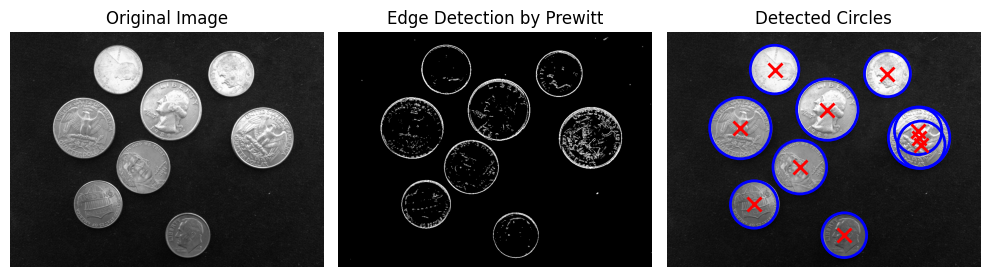

Terdeteksi 10 lingkaran.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters, feature
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.draw import circle_perimeter
from matplotlib.patches import Circle
import cv2
import os

filename = 'coins.png'

if os.path.exists(filename):
    img = io.imread(filename)
    if img.ndim == 3:
        img_gray = color.rgb2gray(img)
    else:
        img_gray = img.astype(np.float64) / 255.0
else:
    print(f"File '{filename}' tidak ditemukan. Menggunakan 'coins' dari library skimage.")
    from skimage import data
    img_gray = data.coins() 
    img_gray = img_gray.astype(np.float64) / 255.0
    img = img_gray

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')

edge_mag = filters.prewitt(img_gray)
bw = edge_mag > 0.15 # Threshold sesuai MATLAB

plt.subplot(1, 3, 2)
plt.imshow(bw, cmap='gray')
plt.title('Edge Detection by Prewitt')
plt.axis('off')


hough_radii = np.arange(70, 101, 2) 

print("Menghitung Hough Transform (ini mungkin memakan waktu)...")
hough_res = hough_circle(bw, hough_radii)

accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii, total_num_peaks=10, min_xdistance=20, min_ydistance=20)

ax = plt.subplot(1, 3, 3)
ax.imshow(img_gray, cmap='gray')
ax.set_title('Detected Circles')
ax.axis('off')

for center_y, center_x, radius in zip(cy, cx, radii):
    ax.plot(center_x, center_y, 'xr', markersize=10, markeredgewidth=2)
    
    circ = Circle((center_x, center_y), radius, fill=False, color='blue', linewidth=2)
    ax.add_patch(circ)

plt.tight_layout()
plt.show()

print(f"Terdeteksi {len(radii)} lingkaran.")